In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
def gussian(x, c, d):
    return np.exp(-(x - c)**2/(2 * d ** 2))

In [ ]:
def KMeans(X, k):
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    converged = False

    while not converged:
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)
 
        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
 
        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
 
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
 
    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        
 
    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()       
 
    return clusters

In [ ]:
# def KMeans(x,k):
      
#     #Random Centroids
#     centroids = x[np.random.choice(x.shape[0], k,replace= False)]

#     #Clusters's Distance From 2D-points
#     distance = cdist(x, centroids ,'euclidean') 
    
#     #Label Assignment to K Clusters
#     label = np.array([np.argmin(i) for i in distance]) 
    
#     iterations = 100
#     for i in range(iterations): 
#       centroids = []
#       for icluster in range(k):
#         #Updating Centroids by taking mean of Cluster it belongs to
#         centroids.append(np.array(x)[label == icluster].mean(axis=0))
        
#       distances = cdist(x, centroids ,'euclidean')
#       label = np.array([np.argmin(i) for i in distances])
        
#     return centroids

In [ ]:
class myRBF:

    def __init__(self, k=2, lr=0.01, epochs=100, rbf=gussian):

      self.k = k
      self.lr = lr
      self.epochs = epochs
      self.rbf = rbf
      self.w = np.random.randn(k)
      self.b = np.random.randn(1)

    def fit(self, X, y):
      self.centers= KMeans(X, self.k)

      for i in range(self.centers.shape[0]):
        print(f'center{i+1}: {self.centers[i]}')
      
      dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
      self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
      
      print('\n (dmax)standard deviation is:{0:.4f}'.format(dMax))

      for epoch in range(self.epochs):

          for i in range(X.shape[0]):   # forward pass
              a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
              a=a.T
              F = a.dot(self.w) + self.b

              error = -(y[i] - F).flatten()   

              self.w = self.w - self.lr * a * error   #updating
              self.b = self.b - self.lr * error

    def predict(self, X):

          ypred = []
          for i in range(X.shape[0]):
              a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
              a=a.T
              F = a.dot(self.w) + self.b
              ypred.append(F)
          return np.array(ypred)



center1: 0.020202020202020363
center2: -0.8080808080808082
center3: 1.6363636363636367
center4: -1.616161616161616
center5: 0.8484848484848488

 (dmax)standard deviation is:3.2525

Result is: 


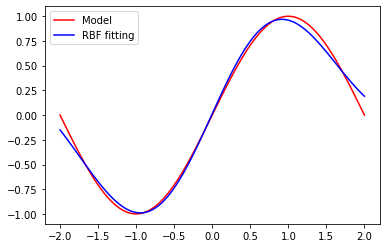

center1: -1.5555555555555554
center2: 1.676767676767677
center3: 0.2020202020202022
center4: 0.9696969696969701
center5: -0.6464646464646463

 (dmax)standard deviation is:3.2323

Result is: 


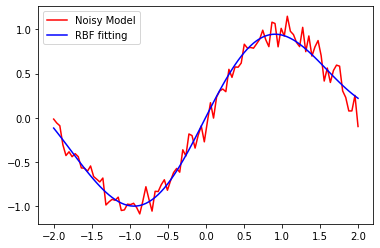

In [ ]:
n = 100
ep = 500;

X = np.linspace(-2, 2, n)
y = np.sin(2*np.pi * X/4) 

rbf1 = myRBF(k=5,epochs=ep)
rbf1.fit(X, y)
print('\nResult is: ')
plt.plot(X, y, 'r', label='Model')
plt.plot(X, rbf1.predict(X), 'b', label='RBF fitting')
plt.legend()
plt.show()


X = np.linspace(-2, 2, n)
y = np.sin(2*np.pi * X/4) + 0.1 * np.random.randn(n)

rbf2 = myRBF(k=5,epochs=ep)
rbf2.fit(X, y)
print('\nResult is: ')
plt.plot(X, y, 'r', label='Noisy Model')
plt.plot(X, rbf2.predict(X), 'b', label='RBF fitting')
plt.legend()
plt.show()

Model accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


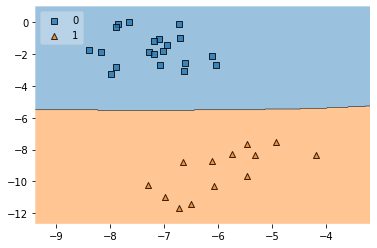

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs



# Generate data

X, y = make_blobs(n_features=2, centers=2)


# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

# Create the SVM
svm = SVC(random_state=50, kernel='rbf')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred = svm.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.show()


# Generate data
# X, _ = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.30)

# rbf3 = myRBF(k=5,epochs=ep)
# rbf3.fit(X, y)
# print('\nResult is: ')
# plt.plot(X, y, 'r', label='Model')
# plt.plot(X, rbf1.predict(X), 'b', label='RBF fitting')
# plt.legend()
# plt.show()



# plt.plot(X[:,0],X[:,1],'ro')

Model accuracy: 0.9494949494949495


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


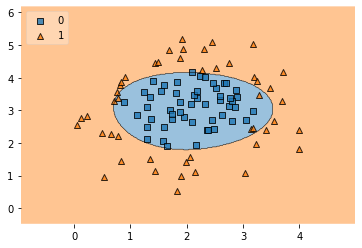

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions



# Generate data
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300, mean=(2,3))

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the SVM
svm = SVC(random_state=42, kernel='rbf')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred = svm.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.show()


# Generate data
# X, _ = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.30)

# rbf3 = myRBF(k=5,epochs=ep)
# rbf3.fit(X, y)
# print('\nResult is: ')
# plt.plot(X, y, 'r', label='Model')
# plt.plot(X, rbf1.predict(X), 'b', label='RBF fitting')
# plt.legend()
# plt.show()



# plt.plot(X[:,0],X[:,1],'ro')